In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)
from datetime import datetime,timedelta
import warnings
warnings.simplefilter('ignore')
from matplotlib.ticker import StrMethodFormatter
from IPython.display import Image

In [2]:
df = pd.read_csv('US_Accidents_March23.csv')

In [3]:
accidents = df.copy()

### First look and changes to our data

In [4]:
accidents.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [6]:
accidents.drop(['Source', 'Description','Country','Zipcode', 'Airport_Code','County','End_Time','Timezone','Amenity','Bump','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight','End_Lat','End_Lng','Distance(mi)'],axis=1,inplace=True)

In [7]:
accidents['ID'].nunique()

7728394

In [8]:
accidents['Severity'].value_counts()

Severity
2    6156981
3    1299337
4     204710
1      67366
Name: count, dtype: int64

In [9]:
severity_dict = {1: 'Minor',2: 'Moderate',3: 'Severe',4: 'Fatal'}

In [10]:
accidents['Severity'] = accidents['Severity'].map(severity_dict)

In [11]:
accidents

,ID,Severity,Start_Time,Start_Lat,Start_Lng,Street,City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset
0,A-1,Severe,2016-02-08 05:46:00,39.865147,-84.058723,I-70 E,Dayton,OH,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,Night
1,A-2,Moderate,2016-02-08 06:07:59,39.928059,-82.831184,Brice Rd,Reynoldsburg,OH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,Night
2,A-3,Moderate,2016-02-08 06:49:27,39.063148,-84.032608,State Route 32,Williamsburg,OH,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,Night
3,A-4,Severe,2016-02-08 07:23:34,39.747753,-84.205582,I-75 S,Dayton,OH,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,Night
4,A-5,Moderate,2016-02-08 07:39:07,39.627781,-84.188354,Miamisburg Centerville Rd,Dayton,OH,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Moderate,2019-08-23 18:03:25,34.002480,-117.379360,Pomona Fwy E,Riverside,CA,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,Day
7728390,A-7777758,Moderate,2019-08-23 19:11:30,32.766960,-117.148060,I-8 W,San Diego,CA,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,Day
7728391,A-7777759,Moderate,2019-08-23 19:00:21,33.775450,-117.847790,Garden Grove Fwy,Orange,CA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,Day
7728392,A-7777760,Moderate,2019-08-23 19:00:21,33.992460,-118.403020,San Diego Fwy S,Culver City,CA,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,Day


In [12]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Severity           object 
 2   Start_Time         object 
 3   Start_Lat          float64
 4   Start_Lng          float64
 5   Street             object 
 6   City               object 
 7   State              object 
 8   Weather_Timestamp  object 
 9   Temperature(F)     float64
 10  Wind_Chill(F)      float64
 11  Humidity(%)        float64
 12  Pressure(in)       float64
 13  Visibility(mi)     float64
 14  Wind_Direction     object 
 15  Wind_Speed(mph)    float64
 16  Precipitation(in)  float64
 17  Weather_Condition  object 
 18  Sunrise_Sunset     object 
dtypes: float64(9), object(10)
memory usage: 1.1+ GB


In [13]:
accidents['Start_Time'] = pd.to_datetime(accidents['Start_Time'],format='mixed',dayfirst=True)

In [14]:
print(accidents['Start_Time'].min())
print(accidents['Start_Time'].max())

2016-01-14 20:18:33
2023-03-31 23:30:00


In [15]:
# We will start our analysis from February 2016 in order to analyze full months.

accidents = accidents[accidents['Start_Time']>= '2016-02-01']

In [16]:
accidents['Year'] = accidents['Start_Time'].dt.year

In [17]:
accidents['Month'] = accidents['Start_Time'].dt.month_name()

In [18]:
accidents['Day_of_week'] = accidents['Start_Time'].dt.day_name()

In [19]:
accidents['Hour'] = accidents['Start_Time'].dt.hour

In [20]:
accidents['Hour'].nunique()

24

In [21]:
fatal = accidents[accidents['Severity']== 'Fatal']

### Severity

The vast majority of accidents fall under the moderate severity category, indicating that while incidents are frequent, most do not result in severe or fatal outcomes.

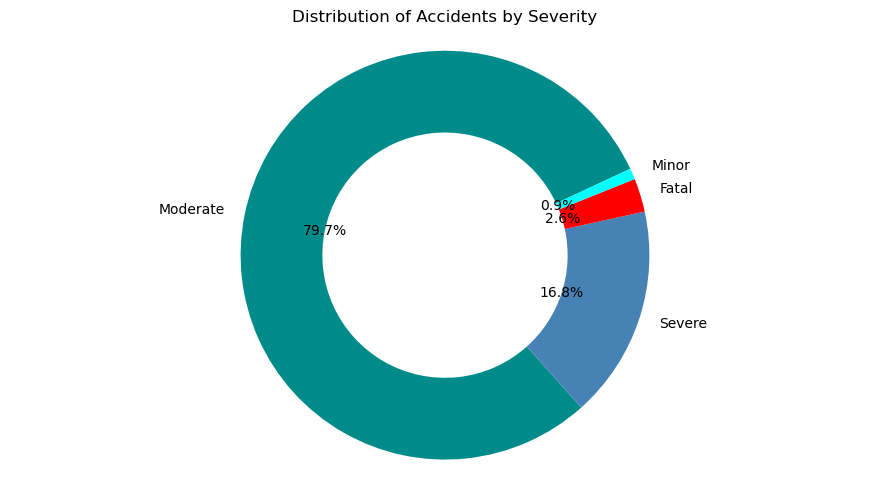

In [22]:
severity_counts = accidents.groupby('Severity')['ID'].count().sort_values(ascending=False)

labels = severity_counts.index.astype(str)
sizes = severity_counts.values

colors = ['darkcyan', 'steelblue', 'red', 'aqua']

fig, ax = plt.subplots(figsize=(9, 5))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=25,
    colors=colors,
    wedgeprops=dict(width=0.4)
)

ax.axis('equal')
plt.title("Distribution of Accidents by Severity")
plt.tight_layout()
plt.show()

### State
Each State's population plays a major role in this graph. California for example is by far the most populated State.

In [23]:
accidents['State'].unique()

array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'NC', 'AZ', 'TN', 'LA',
       'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT',
       'WY', 'ID', 'ND', 'MT', 'SD'], dtype=object)

In [24]:
#Using this dictionary in order to have the full name of the States

states = {
    'OH': 'Ohio',
    'WV': 'West Virginia',
    'CA': 'California',
    'FL': 'Florida',
    'GA': 'Georgia',
    'SC': 'South Carolina',
    'NE': 'Nebraska',
    'IA': 'Iowa',
    'IL': 'Illinois',
    'MO': 'Missouri',
    'WI': 'Wisconsin',
    'IN': 'Indiana',
    'MI': 'Michigan',
    'NJ': 'New Jersey',
    'NY': 'New York',
    'CT': 'Connecticut',
    'MA': 'Massachusetts',
    'RI': 'Rhode Island',
    'NH': 'New Hampshire',
    'PA': 'Pennsylvania',
    'KY': 'Kentucky',
    'MD': 'Maryland',
    'VA': 'Virginia',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'TX': 'Texas',
    'WA': 'Washington',
    'OR': 'Oregon',
    'AL': 'Alabama',
    'NC': 'North Carolina',
    'AZ': 'Arizona',
    'TN': 'Tennessee',
    'LA': 'Louisiana',
    'MN': 'Minnesota',
    'CO': 'Colorado',
    'OK': 'Oklahoma',
    'NV': 'Nevada',
    'UT': 'Utah',
    'KS': 'Kansas',
    'NM': 'New Mexico',
    'AR': 'Arkansas',
    'MS': 'Mississippi',
    'ME': 'Maine',
    'VT': 'Vermont',
    'WY': 'Wyoming',
    'ID': 'Idaho',
    'ND': 'North Dakota',
    'MT': 'Montana',
    'SD': 'South Dakota'
}

In [25]:
accidents['State'] = accidents['State'].map(states)

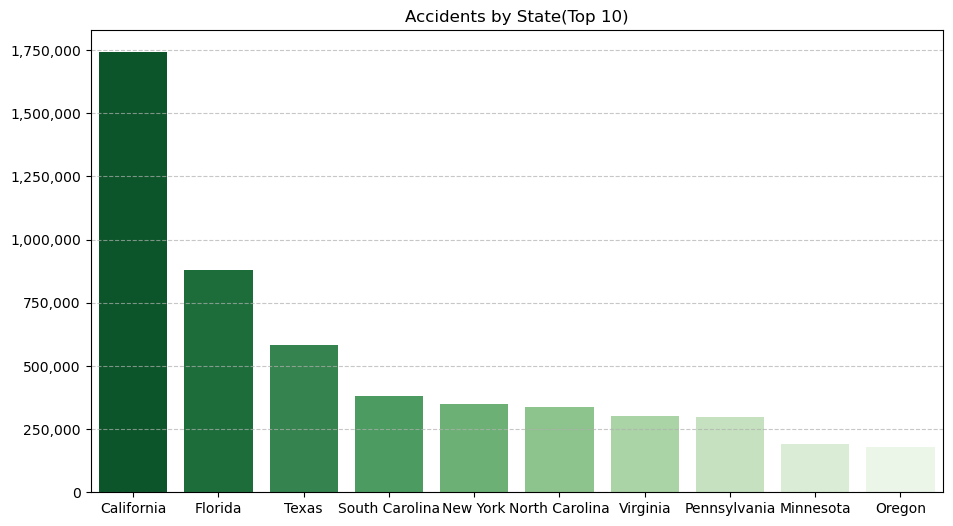

In [26]:
accidents.groupby('State').agg({'ID':'count'}).sort_values('ID',ascending=False).head(10)
fig,ax= plt.subplots(figsize=[11,6])
sns.barplot(data=accidents.groupby('State').agg({'ID':'count'}).sort_values('ID',ascending=False).head(10),
           x='State',
           y='ID',
           palette='Greens_r')
plt.title('Accidents by State(Top 10)')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.ylabel(None)
plt.xlabel(None)
plt.show()

### As we can see East coast has the most accidents

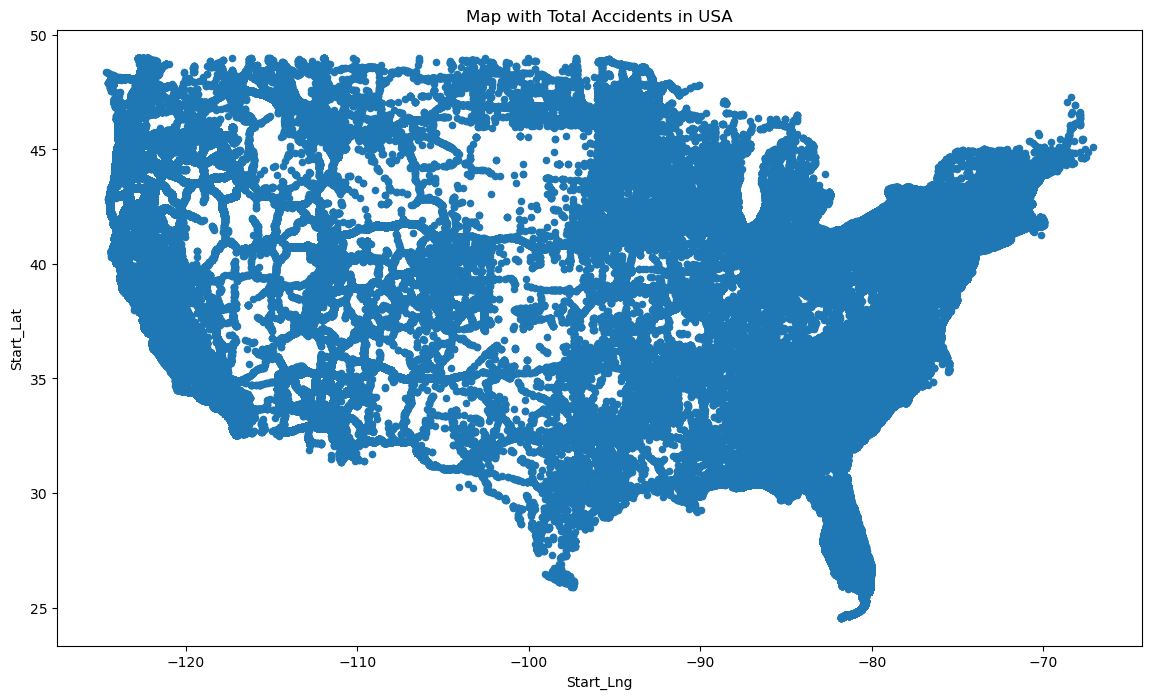

In [27]:
fig = accidents.plot.scatter(x="Start_Lng", y="Start_Lat",  title="Map with Total Accidents in USA", figsize=(14,8), cmap="plasma")
fig
plt.show()

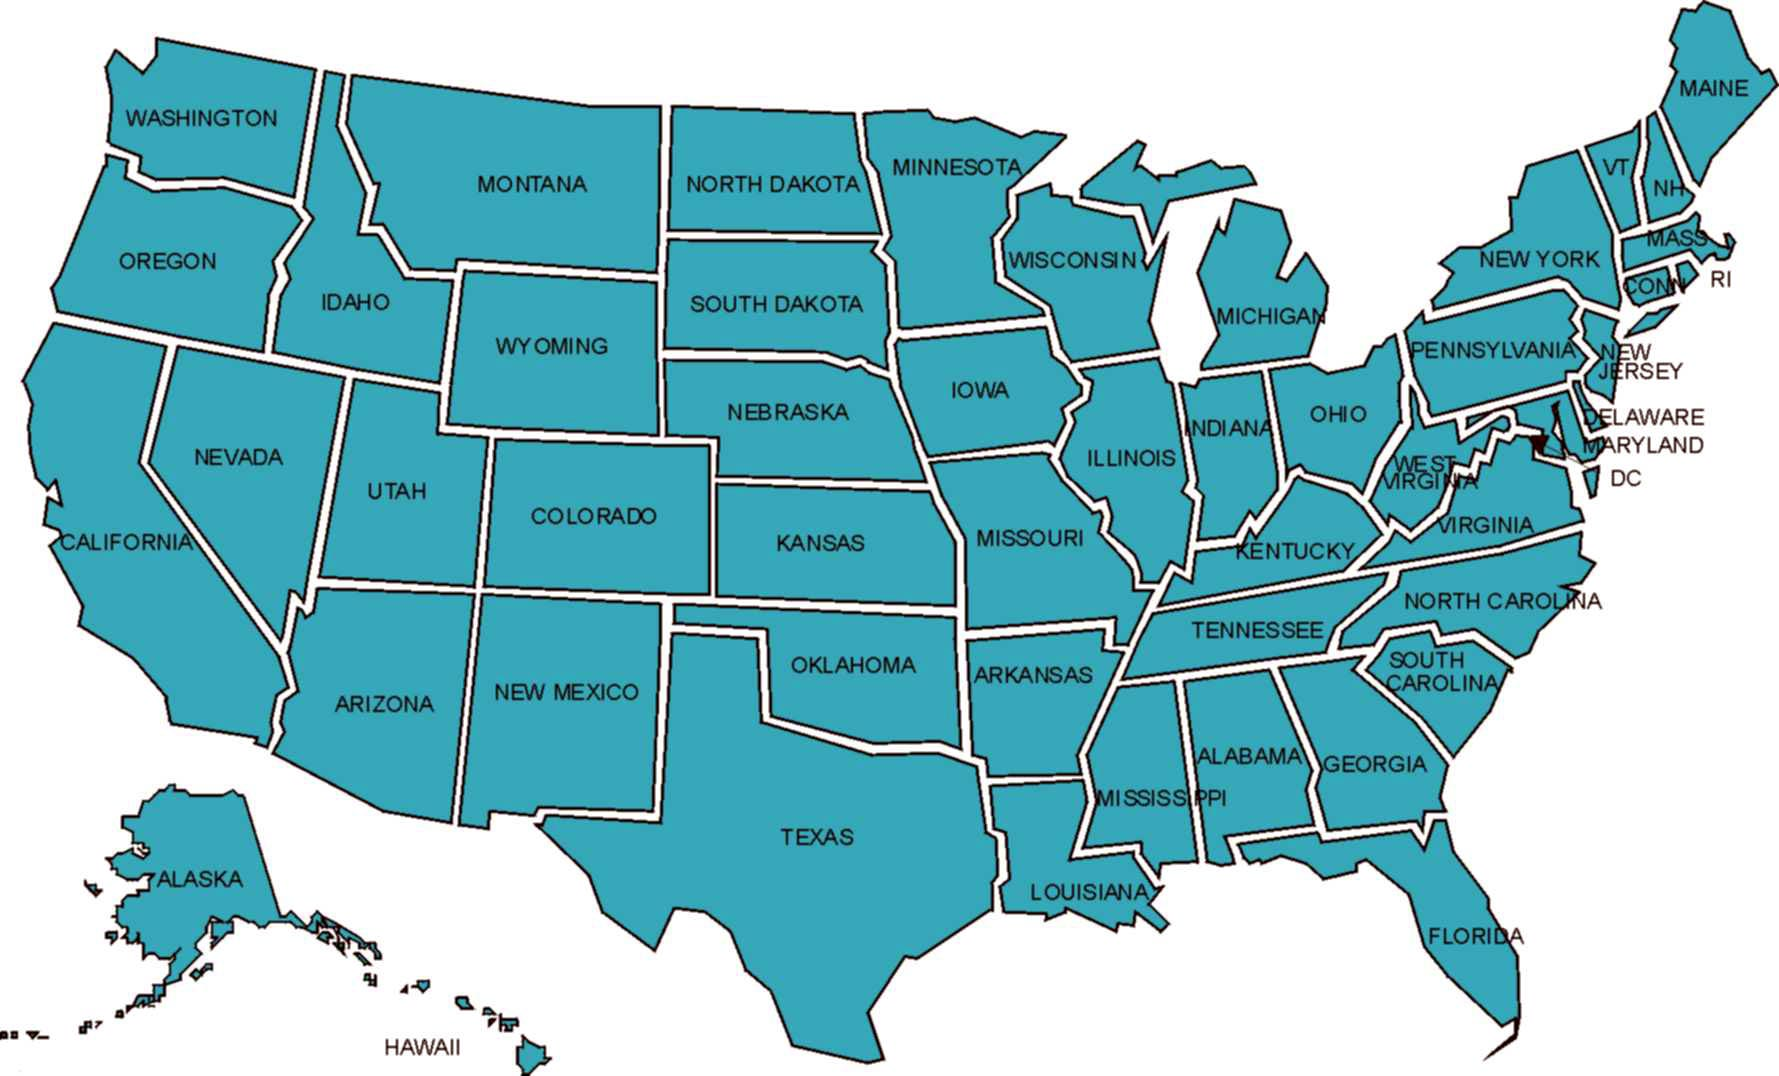

In [28]:
Image(filename=r"usa-map-1.jpg")

### City
This explains a lot about the graph above. Big cities affect the State's overall accident count.
Also, Atlanta stands out in the fatal accident count.

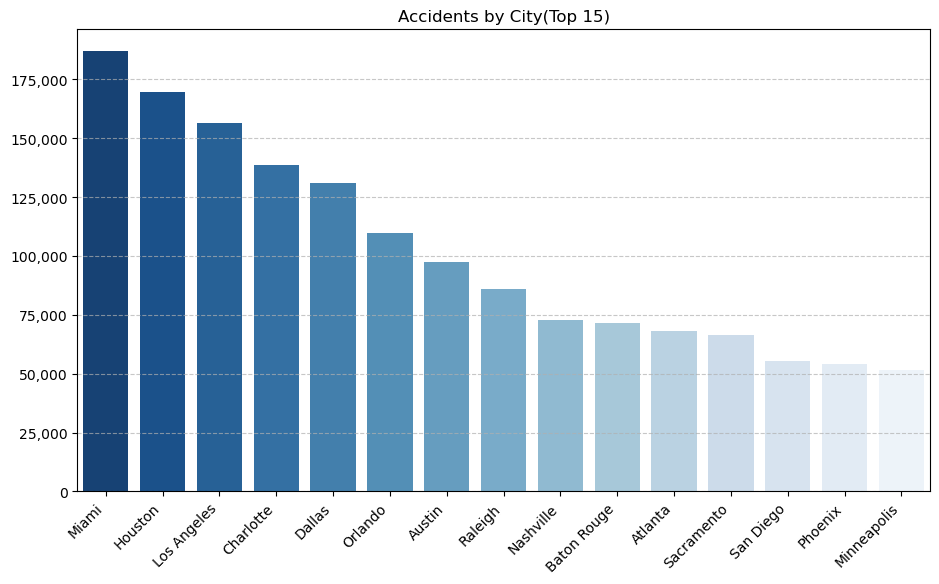

In [29]:
accidents.groupby('City').agg({'ID':'count'}).sort_values('ID',ascending=False).head(15)
fig,ax= plt.subplots(figsize=[11,6])
sns.barplot(data=accidents.groupby('City').agg({'ID':'count'}).sort_values('ID',ascending=False).head(15),
           x='City',
           y='ID',
           palette='Blues_r')
plt.title('Accidents by City(Top 15)')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylabel(None)
plt.xlabel(None)
plt.show()

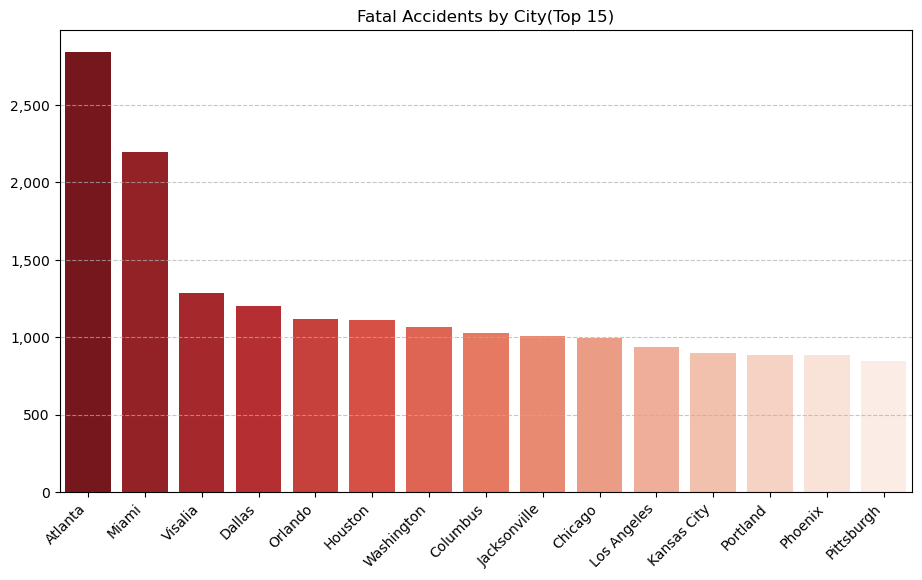

In [30]:
fatal.groupby('City').agg({'ID':'count'}).sort_values('ID',ascending=False).head(15)
fig,ax= plt.subplots(figsize=[11,6])
sns.barplot(data=fatal.groupby('City').agg({'ID':'count'}).sort_values('ID',ascending=False).head(15),
           x='City',
           y='ID',
           palette='Reds_r')
plt.title('Fatal Accidents by City(Top 15)')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylabel(None)
plt.xlabel(None)
plt.show()

### Time of Day
We will categorize the Hour column in order to get better insights.

In [31]:
def time_of_day(x):
    if x >= 0 and x<6:
        return 'Night'
    elif x>=6 and x<12:
        return 'Morning'
    elif x>=12 and x<18:
        return 'Afternoon'
    else:
        return 'Evening'

In [32]:
accidents['Time_of_day'] = accidents['Hour'].apply(lambda x : time_of_day(x))

In [33]:
accidents['Time_of_day'].unique()

array(['Night', 'Morning', 'Afternoon', 'Evening'], dtype=object)

In [34]:
fatal = accidents[accidents['Severity']== 'Fatal']

In [35]:
time_of_day = accidents.groupby('Time_of_day').agg(number_of_accidents=('ID','count'))

The majority of accidents occur during the morning and afternoon hours, which may be attributed to increased traffic volumes as people commute to and from work during these times.

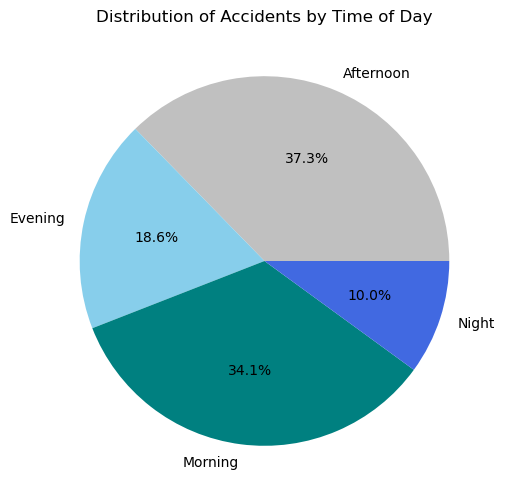

In [36]:
time_of_day.plot.pie(subplots=True,
                     autopct='%1.1f%%',
                     legend=False,
                     ylabel='',
                     colors = ['silver', 'skyblue', 'teal', 'royalblue'],
                    figsize=(9,6))
plt.title('Distribution of Accidents by Time of Day')
plt.show()

Let's compare it with the fatal accidents.

We can see an increasing percentage on evening and night hours.

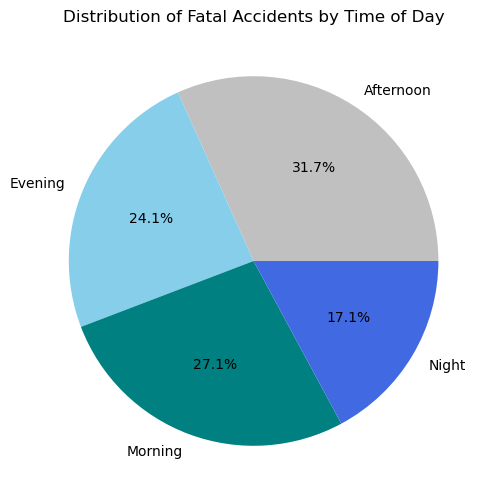

In [37]:
fatal.groupby('Time_of_day').agg(number_of_accidents=('ID','count')).plot.pie(subplots=True,
                     autopct='%1.1f%%',
                     legend=False,
                     ylabel='',
                     colors = ['silver', 'skyblue', 'teal', 'royalblue'],
                    figsize=(9,6))
plt.title('Distribution of Fatal Accidents by Time of Day')
plt.show()

### Day of Week
Car accidents are more frequent on weekdays. This reflects what we previously mentioned about increased traffic volumes associated with the everyday job routine.

Fatal accidents tend to slightly increase on weekends, probably because of riskier driving behavior, such as speeding or impaired driving.

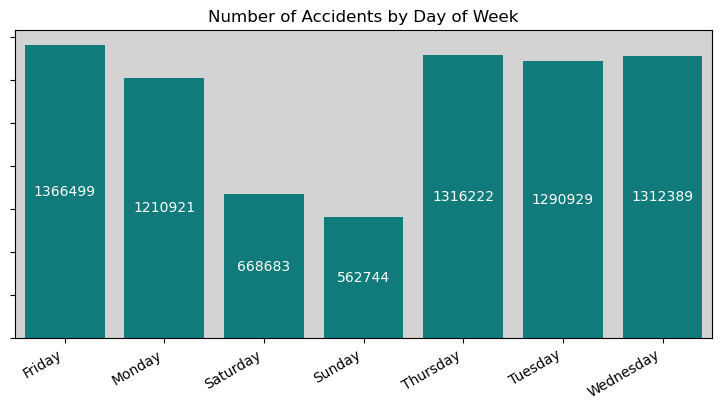

In [38]:
accidents.groupby('Day_of_week').agg(number_of_accidents=('ID','count'))
fig,ax= plt.subplots(figsize=[9,4])
sns.barplot(data=accidents.groupby('Day_of_week').agg(number_of_accidents=('ID','count')),
           x='Day_of_week',
           y='number_of_accidents',
           color='darkcyan')
plt.title('Number of Accidents by Day of Week')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.set_yticklabels([])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30,ha='right')
ax.set_facecolor('lightgrey')
bars = ax.containers[0]
ax.bar_label(bars, fmt='%.0f', label_type='center', color='white')
plt.ylabel(None)
plt.xlabel(None)
plt.show()

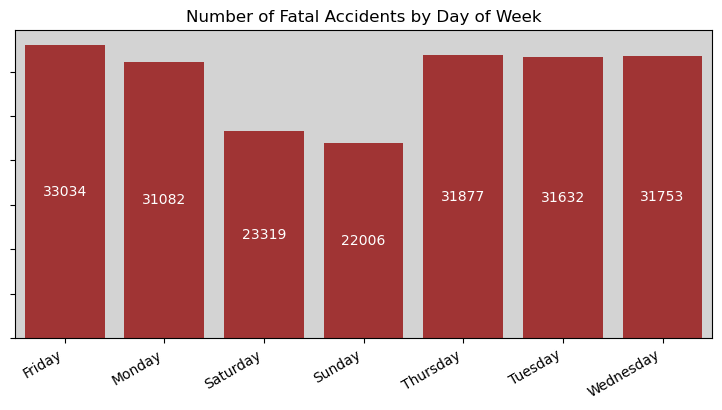

In [39]:
fatal.groupby('Day_of_week').agg(number_of_accidents=('ID','count'))
fig,ax= plt.subplots(figsize=[9,4])
sns.barplot(data=fatal.groupby('Day_of_week').agg(number_of_accidents=('ID','count')),
           x='Day_of_week',
           y='number_of_accidents',
           color='firebrick')
plt.title('Number of Fatal Accidents by Day of Week')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.set_yticklabels([])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.set_facecolor('lightgrey')
bars = ax.containers[0]
ax.bar_label(bars, fmt='%.0f', label_type='center', color='white')
plt.ylabel(None)
plt.xlabel(None)
plt.show()

### Weather and Lighting
It is clear that the majority of the accidents happen in favorable weather conditions. 

Drivers tend to be more relaxed when the weather is good.

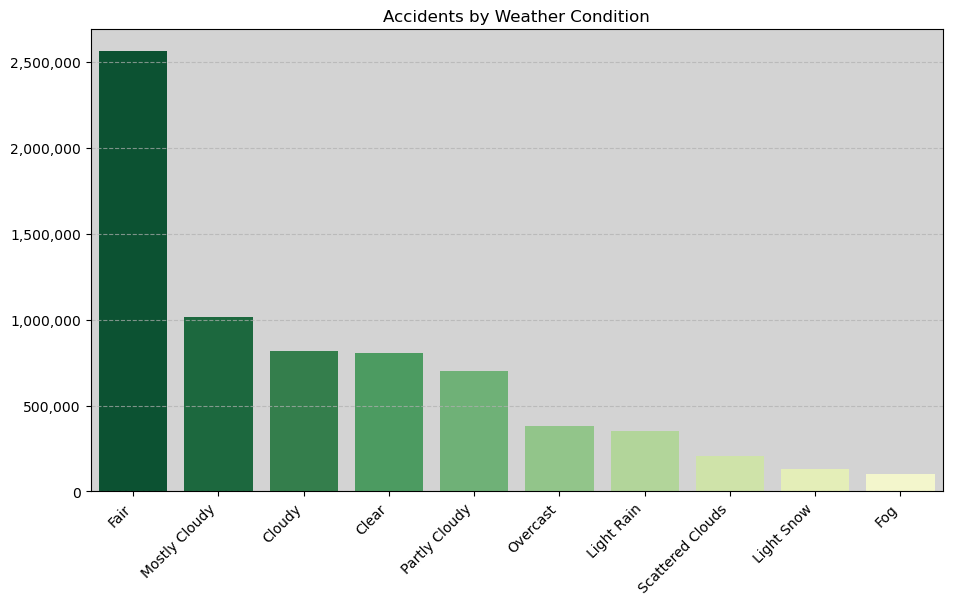

In [40]:
weather10 = accidents.groupby('Weather_Condition').agg(number_of_accidents=('ID','count')).sort_values('number_of_accidents',ascending=False).head(10)
fig,ax= plt.subplots(figsize=[11,6])
sns.barplot(data=weather10,
           x='Weather_Condition',
           y='number_of_accidents',
           palette='YlGn_r')
plt.title('Accidents by Weather Condition')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_facecolor('lightgrey')
plt.ylabel(None)
plt.xlabel(None)
plt.show()

Almost 70% of the accidents happens in daylight.

There is a decrease in that percentage in fatal accidents, something we would expect. 

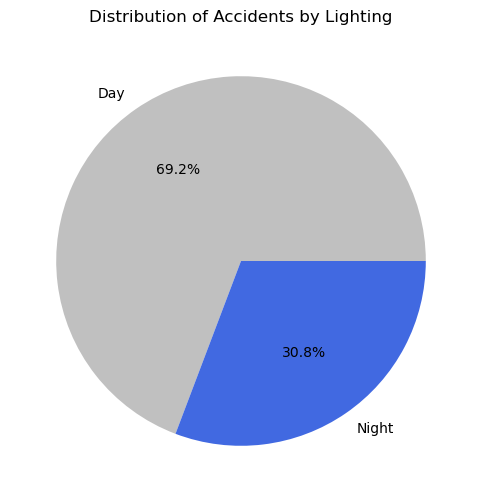

In [41]:
accidents['Sunrise_Sunset'].value_counts().plot.pie(subplots=True,autopct='%1.1f%%',
                     legend=False,
                     ylabel='',
                     colors = ['silver', 'royalblue'],
                    figsize=(9,6))
plt.title('Distribution of Accidents by Lighting')
plt.show()

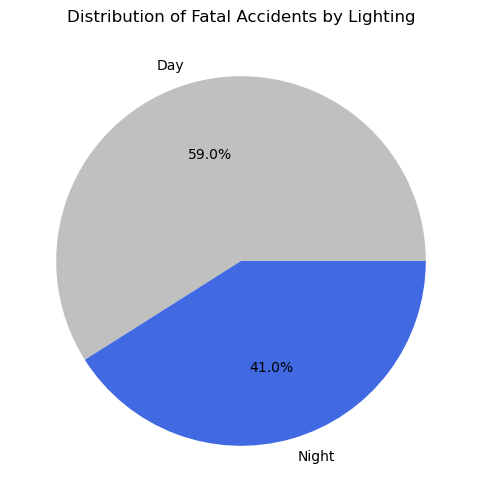

In [42]:
fatal['Sunrise_Sunset'].value_counts().plot.pie(subplots=True,autopct='%1.1f%%',
                     legend=False,
                     ylabel='',
                     colors = ['silver', 'royalblue'],
                    figsize=(9,6))
plt.title('Distribution of Fatal Accidents by Lighting')
plt.show()

### Accidents by Month
It is clear that Winter and Autumn experience a higher incidence of car accidents compared to other seasons.

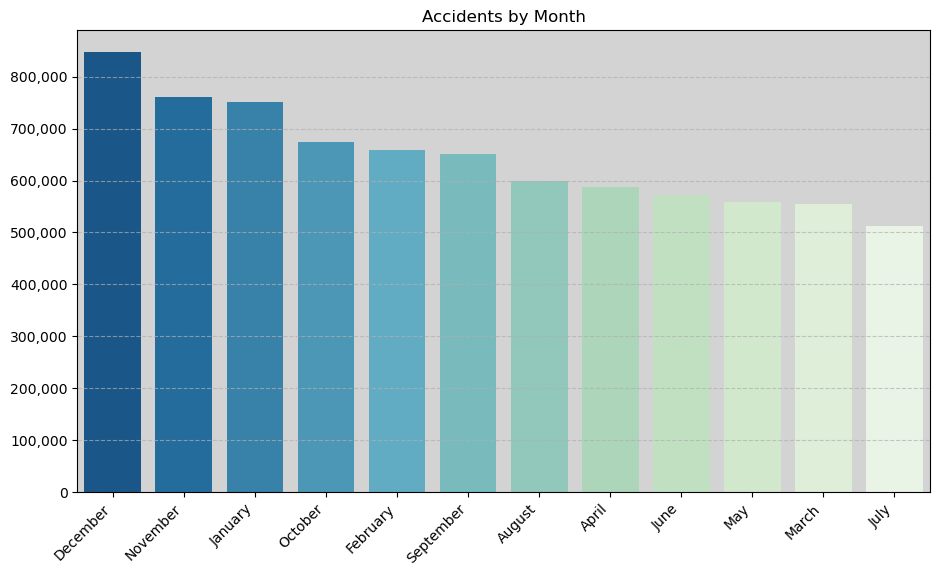

In [43]:
months = accidents.groupby('Month').agg(number_of_accidents=('ID','count')).reset_index().sort_values('number_of_accidents',ascending=False)
fig,ax= plt.subplots(figsize=[11,6])
sns.barplot(data=months,
           x='Month',
           y='number_of_accidents',
           palette='GnBu_r')
plt.title('Accidents by Month')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_facecolor('lightgrey')
plt.ylabel(None)
plt.xlabel(None)
plt.show()

### Now we will see the Fatal / Accidents Ratio. We want to find the cities that have a big precentage of fatal accidents versus their overall accident count. In order to do that we will add a filter in our new dataframe in order to avoid having small cities with low number of accidents.

In [44]:
accident_counts = accidents['City'].value_counts()

In [45]:
high_accident_cities = accident_counts[accident_counts > 10000]

In [46]:
df_high_accidents = accidents[accidents['City'].isin(high_accident_cities.index)]

In [47]:
accidents_filtered = df_high_accidents.groupby(['City','Severity']).agg({'ID':'count'}).reset_index()

In [48]:
total_accidents = df_high_accidents.groupby('City').size()

In [49]:
fatal_accidents = df_high_accidents[df_high_accidents['Severity'] == 'Fatal'].groupby('City').size()

In [50]:
fatal_ratio = (fatal_accidents / total_accidents).fillna(0)

In [51]:
fatal_ratio_df = fatal_ratio.reset_index(name='Fatal_Ratio')

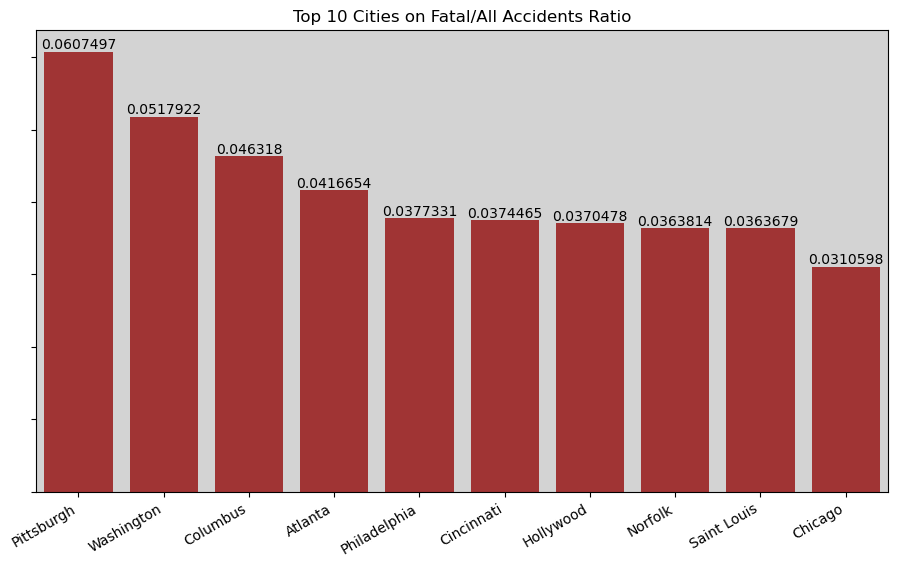

In [54]:
fatal_ratio_df.sort_values('Fatal_Ratio',ascending=False).head(10)
fig,ax= plt.subplots(figsize=[11,6])
sns.barplot(data=fatal_ratio_df.sort_values('Fatal_Ratio',ascending=False).head(10),
           x='City',
           y='Fatal_Ratio',
            color='firebrick')
plt.title('Top 10 Cities on Fatal/All Accidents Ratio')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.set_yticklabels([])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.set_facecolor('lightgrey')
bars = ax.containers[0]
ax.bar_label(bars, label_type='edge', color='black')
plt.ylabel(None)
plt.xlabel(None)
plt.show()

In [53]:
import plotly.express as px
import streamlit as st

In [55]:
accidents

,ID,Severity,Start_Time,Start_Lat,Start_Lng,Street,City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Year,Month,Day_of_week,Hour,Time_of_day
0,A-1,Severe,2016-02-08 05:46:00,39.865147,-84.058723,I-70 E,Dayton,Ohio,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,Night,2016,February,Monday,5,Night
1,A-2,Moderate,2016-02-08 06:07:59,39.928059,-82.831184,Brice Rd,Reynoldsburg,Ohio,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,Night,2016,February,Monday,6,Morning
2,A-3,Moderate,2016-02-08 06:49:27,39.063148,-84.032608,State Route 32,Williamsburg,Ohio,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,Night,2016,February,Monday,6,Morning
3,A-4,Severe,2016-02-08 07:23:34,39.747753,-84.205582,I-75 S,Dayton,Ohio,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,Night,2016,February,Monday,7,Morning
4,A-5,Moderate,2016-02-08 07:39:07,39.627781,-84.188354,Miamisburg Centerville Rd,Dayton,Ohio,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,Day,2016,February,Monday,7,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Moderate,2019-08-23 18:03:25,34.002480,-117.379360,Pomona Fwy E,Riverside,California,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,Day,2019,August,Friday,18,Evening
7728390,A-7777758,Moderate,2019-08-23 19:11:30,32.766960,-117.148060,I-8 W,San Diego,California,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,Day,2019,August,Friday,19,Evening
7728391,A-7777759,Moderate,2019-08-23 19:00:21,33.775450,-117.847790,Garden Grove Fwy,Orange,California,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,Day,2019,August,Friday,19,Evening
7728392,A-7777760,Moderate,2019-08-23 19:00:21,33.992460,-118.403020,San Diego Fwy S,Culver City,California,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,Day,2019,August,Friday,19,Evening
